In [8]:
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import emoji
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize

%matplotlib inline

In [9]:
conservative  = pd.read_csv("data/conservative.csv")
liberal  = pd.read_csv("data/liberal.csv")

In [10]:
conservative.head()
liberal.head()

,Unnamed: 0,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,hashtags,...,retweet_count,retweeted,retweeted_status_id,source,text,topic,truncated,user_id,user_mentions,withheld_in_countries
0,0,NaN,NaN,2020-08-15 16:56:35+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,NaN,...,1188,False,1.294341e+18,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @horn: Das Gesundheitsamt in Trier klagt üb...,coronavirus,False,23748576,Dennis Horn,NaN
1,1,NaN,NaN,2020-08-15 16:56:35+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,NaN,...,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",@XanderKoolman Het coronavirus is echt een eco...,coronavirus,False,82467388,Xander Koolman,NaN
2,2,NaN,NaN,2020-08-15 16:56:35+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,NaN,...,23,False,1.294666e+18,"<a href=""http://twitter.com/download/iphone"" r...",RT @robbysikka: Incredibly proud of this work....,coronavirus,False,47207043,"Robby Sikka, Yale School of Public Health",NaN
3,3,NaN,NaN,2020-08-15 16:56:35+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,NaN,...,85,False,1.294635e+18,"<a href=""http://twitter.com/download/iphone"" r...",RT @BeholdIsrael: 1 in 2 Russian Doctors Distr...,coronavirus,False,1035966863308718080,Amir Tsarfati,NaN
4,4,NaN,NaN,2020-08-15 16:56:35+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,NaN,...,25,False,1.294435e+18,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @CT_Bergstrom: @Newsweek Here's is the rele...,coronavirus,False,19503588,"Carl T. Bergstrom, Newsweek",NaN


In [11]:
rt = r'RT'
rt_pattern = re.compile(rt)

reference = r'\@\w+:|\@\w+'
reference_re = re.compile(reference)

pattern = r'https://t.co/[A-Z0-9._%+-]+'
dots = re.compile(pattern, flags=re.IGNORECASE)

In [12]:
conservative['text'] = conservative['text'].str.replace(rt_pattern, '').str.replace(reference_re, '').str.replace(dots, '').str.replace(r'^.\s+', '').str.replace('\n', ' . ')

conservative['emoji'] = conservative['text'].apply(lambda x: [(c, emoji.UNICODE_EMOJI[c]) for c in x if c in emoji.UNICODE_EMOJI])


liberal['text'] = liberal['text'].str.replace(rt_pattern, '').str.replace(reference_re, '').str.replace(dots, '').str.replace(r'^.\s+', '').str.replace('\n', ' . ')


liberal['emoji'] = liberal['text'].apply(lambda x: [(c, emoji.UNICODE_EMOJI[c]) for c in x if c in emoji.UNICODE_EMOJI])


In [13]:
# !pip install contractions
import contractions
import nltk
# contraction_patterns = [(r'can\'t', 'cannot'),
#                        (r'haven\'t', 'have not'),
#                         (r'(\w+)\'ll', '\g<1> will'),
#                        (r'(\w+)\'re', '\g<1> are'),
#                        (r'you\'re', 'you are'),
#                        (r'you\'ve', 'you have'),
#                        (r'you\'ll', 'you will'),
#                        (r'n\'t', ' not'),
#                        (r'\'s', ' is')]

# # Replacing contractions
# class contraction_replacer(object):
#     def __init__(self, contraction_patterns):
#         self._contraction_regexes = [(re.compile(p), replaced_text) for p, replaced_text in contraction_patterns]
    
#     def do_contraction_normalization(self, text):
#         for contraction_regex, replaced_text in self._contraction_regexes:
#             text = contraction_regex.sub(replaced_text, text)
#         return text

stopwords = nltk.corpus.stopwords.words('english')

# sample_contraction_replacer = contraction_replacer(contraction_patterns)

from nltk.stem import WordNetLemmatizer
wnetl = WordNetLemmatizer()

def text_cleaner(text):
    # Expanding contractions
#     text = sample_contraction_replacer.do_contraction_normalization(text)
    text = contractions.fix(text)
    # Removing stop words
    tokens = word_tokenize(text)
    new_tokens = [w for w in tokens if w not in stopwords]
    # Lemmatizing
    text = ' '.join([wnetl.lemmatize(w) for w in new_tokens])
    return text

In [53]:
# !pip install TextBlob
# from textblob import TextBlob
# !pip install langdetect
# from langdetect import detect
# !pip install regex
# import regex
# from nltk.classify.textcat import TextCat # language identification from NLTK
# tc = TextCat()
# !pip install langid

liberal['tweet_len'] = liberal.text.apply(len)

liberal_cleaner = liberal[liberal.tweet_len >= 3]

import re
def replace_foreign_characters(s):
    return re.sub(r'[^\x00-\x7f]',r'', s)

liberal_cleaner['text'] = liberal_cleaner['text'].apply(lambda x: replace_foreign_characters(x)).str.strip()

liberal_cleaner['text'] = liberal_cleaner.text.apply(text_cleaner)


/Users/sawyer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/sawyer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [54]:
conservative['tweet_len'] = conservative.text.apply(len)

conservative_cleaner = conservative[conservative.tweet_len >= 3]

import re
def replace_foreign_characters(s):
    return re.sub(r'[^\x00-\x7f]',r'', s)

conservative_cleaner['text'] = conservative_cleaner['text'].apply(lambda x: replace_foreign_characters(x)).str.strip()

conservative_cleaner['text'] = conservative_cleaner.text.apply(text_cleaner)


/Users/sawyer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/sawyer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


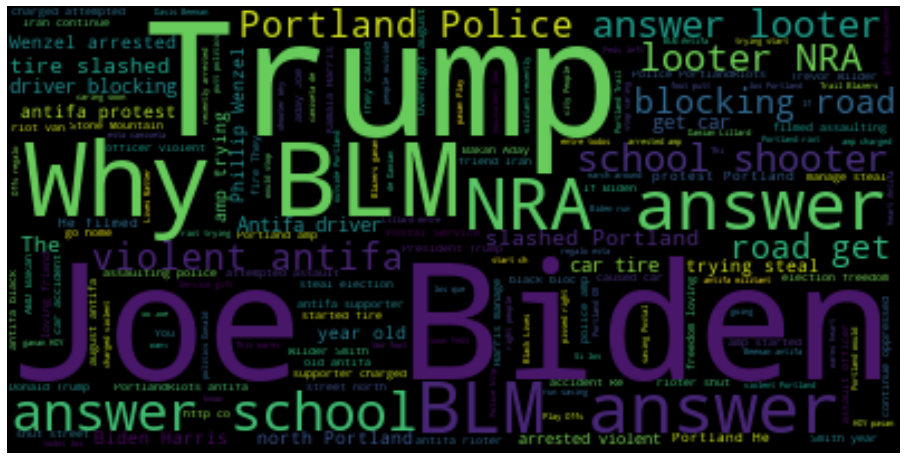

In [55]:
our_tweets = ' '.join(conservative_cleaner['text'].to_list())
wordcloud = WordCloud().generate(our_tweets)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

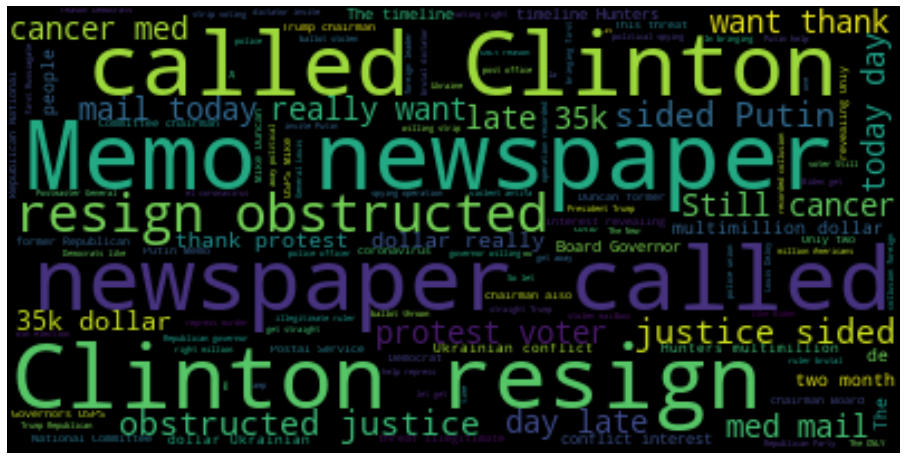

In [56]:
our_tweets = ' '.join(liberal_cleaner['text'].to_list())
wordcloud = WordCloud().generate(our_tweets)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()